# Pandas (часть 2) на примере Титаника

<img src="https://www.dropbox.com/s/qeh64d6jsynffo7/pandas.gif?raw=1">


In [1]:
import pandas as pd
%matplotlib inline

**Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных.


Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Загрузка данных в **pandas** происходит в специальный объект типа **DataFrame**:

In [18]:
pass_data = pd.read_csv('titanic/train.csv')
pass_data.columns = map(str.lower, pass_data.columns) # приведём имена столбцов к нижнему регистру
pass_data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
type(pass_data)

pandas.core.frame.DataFrame

Как видно, данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [20]:
pass_data.head(4)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [21]:
pass_data.tail(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Посмотрим на признаки:

In [22]:
# for col_name in pass_data.columns:
#    print(col_name)
pass_data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [23]:
pass_data[3:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [26]:
pass_data[['name','age']][3:7]

,name,age
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0


In [27]:
pass_data.iloc[89:105, 3:7]

,name,sex,age,sibsp
89,"Celotti, Mr. Francesco",male,24.0,0
90,"Christmann, Mr. Emil",male,29.0,0
91,"Andreasson, Mr. Paul Edvin",male,20.0,0
92,"Chaffee, Mr. Herbert Fuller",male,46.0,1
93,"Dean, Mr. Bertram Frank",male,26.0,1
94,"Coxon, Mr. Daniel",male,59.0,0
95,"Shorney, Mr. Charles Joseph",male,NaN,0
96,"Goldschmidt, Mr. George B",male,71.0,0
97,"Greenfield, Mr. William Bertram",male,23.0,0
98,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0


In [29]:
pass_data.loc[1:5, ['name', 'age']]

,name,age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN


In [30]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [31]:
pass_data[['name', 'sex', 'parch']].head()

,name,sex,parch
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0
2,"Heikkinen, Miss. Laina",female,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0
4,"Allen, Mr. William Henry",male,0


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [32]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
# женщины старше 60 и мужчины на борту
pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] >= 60) | (pass_data['sex'] == 'male')].head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### Пример
Посмотрим, сколько на борту было относительно молодых женщин, путешествующих в одиночку. Скорее всего, довольно мало, потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.

In [34]:
pass_data[(pass_data.sex == 'female') & 
          (pass_data.age > 18) & 
          (pass_data.age < 25) & 
          (pass_data.sibsp == 0) &
          (pass_data.parch == 0)].shape

(25, 12)

Кроме того, для заданного признака можно построить гистограмму:

<Axes: >

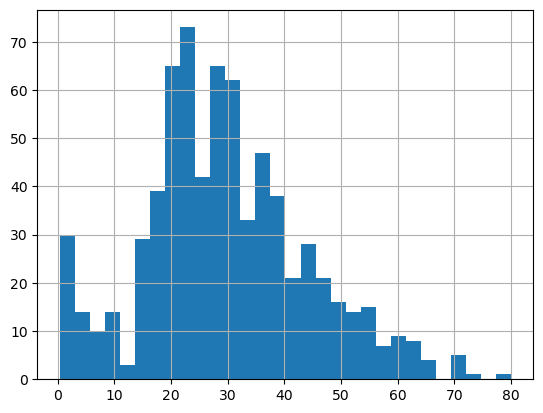

In [35]:
pass_data.age.hist(bins = 30)

## Редактирование DataFrame

* Переименование признаков

In [36]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [37]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: name, dtype: object

* Добавление признака

In [38]:
pass_data['Last_name'] = last_names
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


* Удаление признака

In [39]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Работа с пропущенными данными

Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [42]:
pass_data['cabin'].isnull().head()

0     True
1    False
2     True
3    False
4     True
Name: cabin, dtype: bool

In [44]:
pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером кабины

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* Сортировка объектов/признаков

In [45]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [46]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [47]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [48]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: pclass, dtype: int64

In [49]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [50]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [51]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [52]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [53]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.742038
1,male,0.188908


## Гистограмма по возрасту

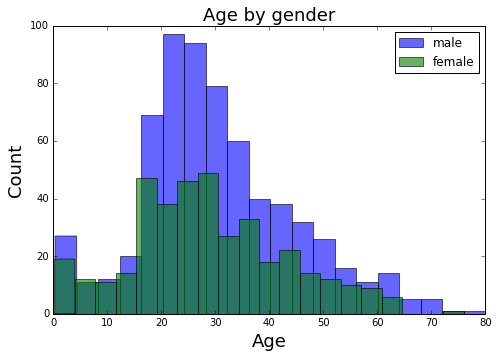

In [104]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 20
index = np.arange(bins)
axes.hist(pass_data[pass_data['Sex'] == 'male']['age'].dropna(), bins=bins, alpha=0.6, label='male')
axes.hist(pass_data[pass_data['Sex'] == 'female']['age'].dropna(), bins=bins, alpha=0.6, label='female')

axes.legend()
axes.set_xlabel('Age', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Age by gender', fontsize=18)

## Сохранение данных

Также данные можно сохранить в файл:

In [54]:
pass_data.to_csv('titanic_2.csv', index=False)